In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.gridspec as gridspec
import pickle5
sys.path.append( "../../data_evaluation")
import handle_dictionaries
import spikeTrainAnalysis as sta
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

from scipy.optimize import curve_fit

Notes

- go to sections "plot functions" and compile

# generate figure from pre-evaluated data

Text(-0.8, 0.42, '5P')

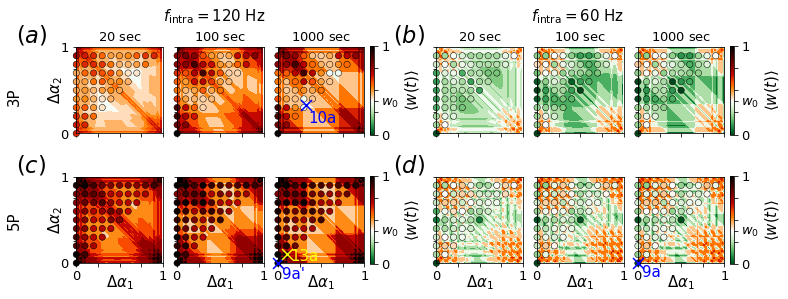

In [3]:
labelFontsize = 15
ticksFontsize = 13


# el.
x1 = 0.05
x2 = 0.17
x3 = 0.19
x4 = 0.31
x5 = 0.33
x6 = 0.48
# vib
x7 = 0.55
x8= 0.67
x9=0.69
x10=0.81
x11= 0.83
x12= 0.98

# bottom
y1 = 0.1
y2 = 0.5
y3 = 0.55
y4 = 0.95
y5 = 1
y6 = 1.4


# illustration of  phase shifts
# top left
gsWe0_early = gridspec.GridSpec(1, 1)
gsWe0_early.update(top=y6, bottom=y5, left=x1, right=x2)

gsWe0_int = gridspec.GridSpec(1, 1)
gsWe0_int.update(top=y6, bottom=y5, left=x3, right=x4)

gsWe0_late = gridspec.GridSpec(1, 1)
gsWe0_late.update(top=y6, bottom=y5, left=x5, right=x6)

# left
gsWe1_early = gridspec.GridSpec(1, 1)
gsWe1_early.update(top=y4, bottom=y3, left=x1, right=x2)

gsWe1_int = gridspec.GridSpec(1, 1)
gsWe1_int.update(top=y4, bottom=y3, left=x3, right=x4)

gsWe1_late = gridspec.GridSpec(1, 1)
gsWe1_late.update(top=y4, bottom=y3, left=x5, right=x6)


# bottom left
gsWe2_early = gridspec.GridSpec(1, 1)
gsWe2_early.update(top=y2, bottom=y1, left=x1, right=x2)

gsWe2_int = gridspec.GridSpec(1, 1)
gsWe2_int.update(top=y2, bottom=y1, left=x3, right=x4)

gsWe2_late = gridspec.GridSpec(1, 1)
gsWe2_late.update(top=y2, bottom=y1, left=x5, right=x6)

# top right
gsWv0_early = gridspec.GridSpec(1, 1)
gsWv0_early.update(top=y6, bottom=y5, left=x7, right=x8)

gsWv0_int = gridspec.GridSpec(1, 1)
gsWv0_int.update(top=y6, bottom=y5, left=x9, right=x10)

gsWv0_late = gridspec.GridSpec(1, 1)
gsWv0_late.update(top=y6, bottom=y5, left=x11, right=x12)

# right
gsWv1_early = gridspec.GridSpec(1, 1)
gsWv1_early.update(top=y4, bottom=y3, left=x7, right=x8)

gsWv1_int = gridspec.GridSpec(1, 1)
gsWv1_int.update(top=y4, bottom=y3, left=x9, right=x10)

gsWv1_late = gridspec.GridSpec(1, 1)
gsWv1_late.update(top=y4, bottom=y3, left=x11, right=x12)

# bottom right
gsWv2_early = gridspec.GridSpec(1, 1)
gsWv2_early.update(top=y2, bottom=y1, left=x7, right=x8)

gsWv2_int = gridspec.GridSpec(1, 1)
gsWv2_int.update(top=y2, bottom=y1, left=x9, right=x10)

gsWv2_late = gridspec.GridSpec(1, 1)
gsWv2_late.update(top=y2, bottom=y1, left=x11, right=x12)






fig = plt.figure( figsize = (10,4) )

M = 3

################################################
# electrical stimulation
fCR_Hz = 5.0 # Hz
Astim = 0.4

# sharp
e_pulse_scale = 1.0
pars = [fCR_Hz, Astim, e_pulse_scale]
s_type = 'el'

s_type = 'intrabursts'

pars = {}
pars['Astim'] = 0.8
pars['de'] = 1.0
pars['M'] = 3
pars['w0'] = 0.38
pars['wmax'] = 1.0
pars['wmin'] = 0.0
pars['fCR_Hz'] = 5.0 # Hz
pars['STDP_type'] = 'aH'
pars['xi'] = 3.0 # ms

################################################
# single electrical pulse de=1 , fCR = 5.0 Hz
pars['PpB'] = 3
# pars['de'] = 1.0
# s_type_0 = 'single'
pars['fintra'] = 120.0 # Hz

ax_early_e0 = fig.add_subplot( gsWe0_early[0,0] )
teval = 3020.0 # sec
plot_mw( ax_early_e0 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
ax_early_e0.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

ax_int_e0 = fig.add_subplot( gsWe0_int[0,0] )
teval = 3100.0 # sec
plot_mw( ax_int_e0 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
ax_int_e0.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

ax_late_e0 = fig.add_subplot( gsWe0_late[0,0] )
teval = 4000.0 # sec
plot_mw( ax_late_e0 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , True )
ax_late_e0.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

################################################
# single electrical pulse de=1 , fCR = 5.0 Hz
pars['PpB'] = 5
pars['fintra'] = 120.0 # Hz

ax_early_e1 = fig.add_subplot( gsWe1_early[0,0] )
teval = 3020.0 # sec
plot_mw( ax_early_e1 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
# ax_early_e1.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

ax_int_e1 = fig.add_subplot( gsWe1_int[0,0] )
teval = 3100.0 # sec
plot_mw( ax_int_e1 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
# ax_int_e1.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

ax_late_e1 = fig.add_subplot( gsWe1_late[0,0] )
teval = 4000.0 # sec
plot_mw( ax_late_e1 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , True )
# ax_late_e1.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )


# ################################################
# # single electrical pulse de=20 , fCR = 5.0 Hz 
# pars['PpB'] = 8
# pars['fintra'] = 120.0 # Hz

# ax_early_e2 = fig.add_subplot( gsWe2_early[0,0] )
# teval = 3020.0 # sec
# plot_mw( ax_early_e2 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )

# ax_int_e2 = fig.add_subplot( gsWe2_int[0,0] )
# teval = 3100.0 # sec
# plot_mw( ax_int_e2 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )

# ax_late_e2 = fig.add_subplot( gsWe2_late[0,0] )
# teval = 4000.0 # sec
# plot_mw( ax_late_e2 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , True )


################################################
# single electrical pulse de=1 , fCR = 5.0 Hz
pars['PpB'] = 3
# pars['de'] = 1.0
# s_type_0 = 'single'
pars['fintra'] = 60.0 # Hz

ax_early_v0 = fig.add_subplot( gsWv0_early[0,0] )
teval = 3020.0 # sec
plot_mw( ax_early_v0 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
ax_early_v0.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

ax_int_v0 = fig.add_subplot( gsWv0_int[0,0] )
teval = 3100.0 # sec
plot_mw( ax_int_v0 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
ax_int_v0.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

ax_late_v0 = fig.add_subplot( gsWv0_late[0,0] )
teval = 4000.0 # sec
plot_mw( ax_late_v0 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , True )
ax_late_v0.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )


################################################
# single electrical pulse de=1 , fCR = 2.5 Hz
pars['PpB'] = 5
pars['fintra'] = 60.0 # Hz

ax_early_v1 = fig.add_subplot( gsWv1_early[0,0] )
teval = 3020.0 # sec
plot_mw( ax_early_v1 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
# ax_early_v1.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

ax_int_v1 = fig.add_subplot( gsWv1_int[0,0])
teval = 3100.0 # sec
plot_mw( ax_int_v1 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
# ax_int_v1.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )

ax_late_v1 = fig.add_subplot( gsWv1_late[0,0])
teval = 4000.0 # sec
plot_mw( ax_late_v1 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , True )
# ax_late_v1.set_title('$'+str( int(teval-3000) )+'$ sec', fontsize = ticksFontsize )



# ################################################
# # single electrical pulse de=20 , fCR = 2.5 Hz
# pars['PpB'] = 8
# pars['fintra'] = 60.0 # Hz

# ax_early_v2 = fig.add_subplot( gsWv2_early[0,0] )
# teval = 3020.0 # sec
# plot_mw( ax_early_v2 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )
# ax_early_v2.text(0.05,0.8,'')

# ax_int_v2 = fig.add_subplot( gsWv2_int[0,0])
# teval = 3100.0 # sec
# plot_mw( ax_int_v2 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , False )

# ax_late_v2 = fig.add_subplot( gsWv2_late[0,0])
# teval = 4000.0 # sec
# cax = plot_mw( ax_late_v2 , pars, s_type, teval, M, ticksFontsize , labelFontsize  , True )



# set labels 
#for ax in [ax_early_e0, ax_int_e0, ax_late_e0, ax_early_e1, ax_int_e1, ax_late_e1, ax_early_e2, ax_int_e2, ax_late_e2, ax_early_v0, ax_int_v0, ax_late_v0, ax_early_v1, ax_int_v1, ax_late_v1, ax_early_v2, ax_int_v2, ax_late_v2]:
for ax in [ax_early_e1, ax_int_e1, ax_late_e1, ax_early_v1, ax_int_v1, ax_late_v1]: #, ax_early_e2, ax_int_e2, ax_late_e2, ax_early_v0, ax_int_v0, ax_late_v0, ax_early_v1, ax_int_v1, ax_late_v1, ax_early_v2, ax_int_v2, ax_late_v2]:
     
    ax.set_xticklabels(['$0$','','','','$1$'], fontsize = ticksFontsize ) 

#for ax in [ax_early_e2, ax_int_e2, ax_late_e2, ax_early_v2, ax_int_v2, ax_late_v2]:
for ax in [ax_early_e1, ax_int_e1, ax_late_e1, ax_early_v1, ax_int_v1, ax_late_v1]:
    
    ax.set_xlabel('$\Delta \\alpha_1$', fontsize = labelFontsize, labelpad=-10)
 
for ax in [ax_early_e0,ax_early_e1]: #, ax_early_e2]:
    
    ax.set_yticklabels(['$0$','','','','$1$'], fontsize = ticksFontsize ) 
    ax.set_ylabel('$\Delta \\alpha_2$', fontsize = labelFontsize, labelpad=-5)

ax_early_e0.text(-0.7,1.05,'$(a)$', fontsize = 1.5*labelFontsize )
ax_early_e1.text(-0.7,1.05,'$(c)$', fontsize = 1.5*labelFontsize )
#ax_early_e2.text(-0.7,1.05,'$(e)$', fontsize = 1.5*labelFontsize )
ax_early_v0.text(-0.5,1.05,'$(b)$', fontsize = 1.5*labelFontsize )
ax_early_v1.text(-0.5,1.05,'$(d)$', fontsize = 1.5*labelFontsize )
#ax_early_v2.text(-0.5,1.05,'$(f)$', fontsize = 1.5*labelFontsize )


### plot markers
mLabelSize = 120
LabelColor = 'blue'
ax_late_e1.scatter([0.0],[0.0], marker='x', color = LabelColor, zorder = 5, s = mLabelSize, clip_on=False)
#ax_late_e1.text(0.05,-0.16,'9b',fontsize = labelFontsize, color=LabelColor)
ax_late_e1.text(0.05,-0.18,"9a'",fontsize = labelFontsize, color=LabelColor)

# LabelColor = 'white'
# ax_late_e1.scatter([0.2],[0.9], marker='x', color = LabelColor, zorder = 5, s = mLabelSize, clip_on=False)
# ax_late_e1.text(0.07,0.68,'10a',fontsize = labelFontsize, color=LabelColor)

LabelColor = 'yellow'
ax_late_e1.scatter([0.1],[0.1], marker='x', color = LabelColor, zorder = 5, s = mLabelSize, clip_on=False)
ax_late_e1.text(0.14,0.02,'13a',fontsize = labelFontsize, color=LabelColor)


LabelColor = 'blue'
ax_late_v1.scatter([0.0],[0.0], marker='x', color = LabelColor, zorder = 5, s = mLabelSize, clip_on=False)
ax_late_v1.text(0.05,-0.16,'9a',fontsize = labelFontsize, color=LabelColor)

LabelColor = 'blue'
ax_late_e0.scatter([0.33],[0.33], marker='x', color = LabelColor, zorder = 5, s = mLabelSize, clip_on=False)
ax_late_e0.text(0.35,0.12,'10a',fontsize = labelFontsize, color=LabelColor)

# ax_late_e0.scatter([0.2],[0.5], marker='x', color = LabelColor, zorder = 5, s = mLabelSize)
# ax_late_e0.text(0.25,0.3,'(g)',fontsize = labelFontsize, color=LabelColor)

# ax_late_e1.scatter([0.1],[0.1], marker='x', color = LabelColor, zorder = 5, s = mLabelSize)
# ax_late_e1.text(-0.17,0.05,'(i)',fontsize = labelFontsize, color=LabelColor)

# ax_late_e1.scatter([0.2],[0.5], marker='x', color = LabelColor, zorder = 5, s = mLabelSize)
# ax_late_e1.text(0.3,0.25,'(k)',fontsize = labelFontsize, color=LabelColor)

# ax_late_v0.scatter([0.1],[0.1], marker='x', color = LabelColor, zorder = 5, s = mLabelSize)
# ax_late_v0.text(-0.17,0.05,'(f)',fontsize = labelFontsize, color=LabelColor)

# ax_late_v0.scatter([0.2],[0.5], marker='x', color = LabelColor, zorder = 5, s = mLabelSize)
# ax_late_v0.text(0.25,0.3,'(h)',fontsize = labelFontsize, color=LabelColor)

# ax_late_v1.scatter([0.1],[0.1], marker='x', color = LabelColor, zorder = 5, s = mLabelSize)
# ax_late_v1.text(-0.17,0.05,'(j)',fontsize = labelFontsize, color=LabelColor)

# ax_late_v1.scatter([0.2],[0.5], marker='x', color = LabelColor, zorder = 5, s = mLabelSize)
# ax_late_v1.text(0.25,0.3,'(l)',fontsize = labelFontsize, color=LabelColor)


ax_early_e0.text(1.0,1.3,'$f_{\\mathrm{intra}} = 120$ Hz', fontsize = labelFontsize)
ax_early_v0.text(1.1,1.3,'$f_{\\mathrm{intra}} = 60$ Hz', fontsize = labelFontsize)

ax_early_e0.text(-0.8,0.35,'3P', fontsize = labelFontsize, rotation=90)
ax_early_e1.text(-0.8,0.42,'5P', fontsize = labelFontsize, rotation=90)

# plt.savefig('Fig7.png', bbox_inches='tight', dpi = 300 )
# plt.savefig('Fig7.pdf', bbox_inches='tight')
# plt.savefig('Fig7.eps', bbox_inches='tight')
# plt.savefig('Fig7.svg', bbox_inches='tight')

# functions

In [2]:
def plot_mw( ax , pars, s_type, teval, M, ticksFontsize , labelFontsize, cbar_on ):

    # get parameter set
    Astim = pars['Astim'] 
    fCR_Hz = pars['fCR_Hz'] 
    fintra_Hz = pars['fintra']
    PpB = pars['PpB']
    de = pars['de']
    M = pars['M'] 
    w0 = pars['w0'] 
    wmax = pars['wmax'] 
    wmin = pars['wmin'] 
    stimulus_type = str(int(PpB))+'p'+str( int(fintra_Hz) )
    STDP_type = pars['STDP_type']  # aH
    tauAxMDen = pars['xi'] # 3.0 ms
    
    # different time steps
    if teval == 3020.0:
        ind_teval = 0
    if teval == 3100.0:
        ind_teval = 1
    if teval == 4000.0:
        ind_teval = 2
           
    # single electrical pulse for PLoS paper
#     if s_type == 'single':     
      
#         filename_dic = 'data/PLoS_phases_electrical_fCR_Hz_'+str(fCR_Hz)+'_Astim_'+str(Astim)+'_PpB_'+str(PpB)+'_e_pulse_scale_'+str(de)+'_M_'+str(M)
#         filename_dic_theory = 'X'
    
    if s_type == 'intrabursts':
        
        filename_dic =        'data/PLoS_phases_electrical_fCR_Hz_'+str(fCR_Hz)+'_intraburst_frequency_'+str(pars['fintra'] )+'_Astim_'+str(Astim)+'_PpB_'+str(PpB)+'_e_pulse_scale_'+str(de)+'_M_'+str(M)
        
        filename_dic_theory = 'data/NEW2_PLoS_normalized_theory_phaselags_fCR_Hz_'+str(fCR_Hz)+'_'+stimulus_type+'_'+pars['STDP_type']+'_xi_'+str(tauAxMDen)+'_M_'+str(M)+'_w0_'+str(w0)+'_Astim_'+str(Astim)+'_de_'+str(de)+'_PpB_'+str(PpB)+'_fintra_Hz_'+str(pars['fintra'] )
        
    # define color map
    nPointsNeg = int(256*np.abs(wmin-w0)/(wmax-wmin))
    colors1 = plt.cm.Greens_r(np.linspace(0., 1, nPointsNeg))
    colors2 = plt.cm.gist_heat_r(np.linspace(0, 1, 256-nPointsNeg))

    # combine them and build a new colormap
    colors = np.vstack((colors1, colors2))
    mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


    # load dictionary with preevaluated simulation data
    if os.path.isfile( filename_dic+'.pickle' ):
        dic = handle_dictionaries.dic_load( filename_dic )
        # print(dic)
        #print(teval)
        da1, da2, mw = load_meanweights_from_dic( dic , teval )
        
        cax = ax.scatter( da1, da2, c=mw, vmin=0, vmax=1, cmap = mymap, edgecolor = 'black', s=40, zorder=2, lw=0.5, clip_on = False )
    else:
        print('WARNING:',filename_dic+'.pickle', 'not found')
        
    # load dictionary with preevaluated theoretical predictions
    #print(filename_dic_theory+'.pickle')
    if os.path.isfile( filename_dic_theory+'.pickle' ):    
        #print(filename_dic_theory)
        # print("true")
        dic_theory = handle_dictionaries.dic_load_new( filename_dic_theory )
        Da1_grid = dic_theory['Da1_grid'] 
        Da2_grid = dic_theory['Da2_grid']  
        mwGrid = dic_theory['mwGrid']
        # print( np.sum( mwGrid) )
    
    
        ax.contourf( Da1_grid, Da2_grid, mwGrid[:,:,ind_teval], vmin=0, vmax=1, cmap = mymap, zorder=1 )
    else:
        print('WARNING:',filename_dic_theory+'.pickle', 'not found')
        
    if cbar_on == True:
        cbar = plt.colorbar( cax, ticks=[0,  0.25, 0.38, 0.5, 0.75, 1], shrink = 0.77 )
        cbar.ax.set_yticklabels( ['$0$',  '', '$w_0$', '', '','$1$'] , fontsize= ticksFontsize )
        cbar.set_label( '$\\langle w(t) \\rangle$' , fontsize=labelFontsize)

    
    
    
    ax.set_xticks([0,0.25,0.5,0.75,1.0])
    ax.set_yticks([0,0.25,0.5,0.75,1.0])
    
    ax.set_xticklabels(['','','','',''], fontsize = ticksFontsize )
    ax.set_yticklabels(['','','','',''], fontsize = ticksFontsize )
    
    ax.set_aspect(1)
    
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    return cax




def load_meanweights_from_dic( dic , teval ):
    
    Da1Val = np.round( np.arange(0,1,0.1) , 2)
    Da2Val = np.round( np.arange(0,1,0.1) , 2) 


    da1 = []
    da2 = []
    mw = []

    for kDa1 in range(len(Da1Val)):

        Da1 = Da1Val[kDa1]

        for kDa2 in range(len(Da2Val)):

            Da2 = Da2Val[kDa2]
            if Da2>=Da1:
                da1.append( Da1 )
                da2.append( Da2 )
                #print(dic['results'][Da1][Da2])
                mw.append( dic['results'][Da1][Da2][teval]['mw_mean'] )

    return np.array(da1), np.array(da2), np.array(mw)


# data evaluation

A) simulation data

NOTE: specify path to simulation data in line 68

In [ ]:
# parameters
fCR_Hz_array = [2.5,5.0,10.0] # Hz
Astim = 0.8
PpB_array = [3,5]

e_pulse_scale_array = [1.0]

for PpB in PpB_array:
    for fCR_Hz in fCR_Hz_array:
        for e_pulse_scale in e_pulse_scale_array:

            print('#########################')
            print( PpB, fCR_Hz, e_pulse_scale )

            M =3 # number of stimulation sites

            evluation_times = [3020,3100,4000] # sec, int, choose multiples of 20 sec
            seed_array = [10,12,14,16,18]

            Da1Val = np.round( np.arange(0,1,0.1) , 2)
            Da2Val = np.round( np.arange(0,1,0.1) , 2) 

            result_data_phase_shifts = np.zeros(  ( len(Da1Val), len(Da2Val), len(evluation_times)+2) )   

            # consider that 2 isolated GPe neurons were considered in simulations
            N_all = 1002
            N = 1000 # network consists only of 1000 neurons
            N_subpop = int(N/float(M))

            # filters for corresponding blocks
            filters_all = np.zeros( (N_all,N_all) )
            filters_all[:N,:N] = np.ones( (N,N) )

            dict_results_e = {}
            dict_results_e['pars'] = {'fCR_Hz' : fCR_Hz, 'Astim': Astim, 'e_pulse_scale':e_pulse_scale, 'M':M, 'PpB':PpB }
            dict_results_e['results'] = {}

            # filename for backup
            dict_results_e['filename']='data/PLoS_phases_electrical_fCR_Hz_'+str(fCR_Hz)+'_Astim_'+str(Astim)+'_PpB_'+str(PpB)+'_e_pulse_scale_'+str(e_pulse_scale)+'_M_'+str(M)

            for kDa1 in range(len(Da1Val)):

                Da1 = Da1Val[kDa1]
                dict_results_e['results'][Da1] = {}

                for kDa2 in range(len(Da2Val)):

                    Da2 = Da2Val[kDa2]
                    dict_results_e['results'][Da1][Da2] = {}

                    if Da2>=Da1:

                        # average over evaluation times
                        for kteval in range(len(evluation_times)):
                            teval = evluation_times[kteval]

                            dict_results_e['results'][Da1][Da2][teval] = {} 

                            # average over network realizations
                            counter_realizations = 0
                            current_mw = []
                            current_mw_blocks = []

                            for seed in seed_array:

                                # directory = "/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/scan_phase_shifts_vCR/initial_seed_10/phase_shifted_vCR_stimulation/fCR_7.0_burstduration_"+str(burst_duration)+"/fburst_250.0_rbaseline_"+str(ramp)+"_ramp_"+str(ramp)+"/Dalpha1_"+str(Da1)+"_Dalpha2_"+str(Da2)+"/seedseq_1_Tstim_1020.0/"
                                # directory = "/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/scan_phase_shifts_eCR/initial_seed_"+str(seed)+"/electrical_stimulation/phase_shifted_periodic_multisite_stimulation/Dalpha1_"+str(Da1)+"_Dalpha2_"+str(Da2)+"/fCR_"+str(fCR_Hz)+"_M_3_e_pulse_scale_"+str(e_pulse_scale)+"/Astim_"+str(Astim)+"_Tstim_1020.0/"+str(teval)+"_sec/"
                                directory = "/Users/jkromer/Desktop/Projects/Stanford/scratch/Phase_shifted_periodic_multisite_stimulation/EL_phase_lags_TASS/initial_seed_"+str(seed)+"/electrical_stimulation/multiple_spikes_phase_shifted_periodic_multisite_stimulation_TASS2012/Dalpha1_"+str(Da1)+"_Dalpha2_"+str(Da2)+"/pulses_per_burst_"+str(PpB)+"/fCR_"+str(fCR_Hz)+"_M_3_e_pulse_scale_"+str(e_pulse_scale)+"/Astim_"+str(Astim)+"_Tstim_1020.0/"+str(teval)+"_sec/"
                                filename_cMatrix = directory + "cMatrix.npz"
                                print(Da1, Da2)
        #                         print(filename_cMatrix)
                                try:
                                    if os.path.isfile( filename_cMatrix ):
                                        print('results found')

                                        cMatrix = scipy.sparse.load_npz( filename_cMatrix ).A

                                        # calculate overall mean weight
                                        current_mw.append( np.mean( np.multiply( cMatrix , filters_all ) )/0.07 )

                                        # first index refers to post, second index refers to pre

                                        # calculate mean weight for blocks
                                        mw_blocks = np.zeros( (M,M) )
                                        for kPre in range(M):
                                            for kPost in range(M):
                                                mw_blocks[kPost,kPre] += np.mean(cMatrix[ (kPost*N_subpop):( (kPost+1)*N_subpop), (kPre*N_subpop):( (kPre+1)*N_subpop) ])/0.07

                                        current_mw_blocks.append( np.copy( mw_blocks ) )

                                        # one more network realization was considered
                                        counter_realizations += 1
                                except: print('WARNING: error while loading data')

                            # average over seeds
                            current_mw_blocks = np.array( current_mw_blocks )
            #                 print(current_mw, np.mean( current_mw ))
            #                 print(current_mw_blocks,  np.mean( current_mw_blocks, axis = 0 ))
                            dict_results_e['results'][Da1][Da2][teval]['mw_mean'] = np.mean( current_mw )
                            dict_results_e['results'][Da1][Da2][teval]['mw_blocks_mean'] = np.mean( current_mw_blocks, axis = 0 )
                            dict_results_e['results'][Da1][Da2][teval]['mw_std'] = np.std( current_mw )
                            dict_results_e['results'][Da1][Da2][teval]['mw_blocks_std'] = np.std( current_mw_blocks, axis = 0 )

            handle_dictionaries.dic_save( dict_results_e )